In [1]:
# Formação Cientista de Dados - Fernando Amaral, Jones Granatyr e Adriano Santos
# Regressão Linear, Faça você mesmo

# FraAnual: Taxa Anual
# CusInic: Investimento Inicial

# Criar um modelo de regressão linear para prever qual será o Investimento inicial necessário de uma franquia a partir da Taxa Anual cobrado pelo franqueador.

In [2]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais - Esse código em Python importa as bibliotecas pandas, numpy, matplotlib.pyplot e LinearRegression do scikit-learn. Ele é comumente usado para realizar análises de regressão linear. A biblioteca pandas é usada para manipular dados, numpy para operações numéricas, matplotlib.pyplot para plotar gráficos e LinearRegression para criar modelos de regressão linear. Essas ferramentas são cruciais para análise de dados e modelagem estatística em Python, facilitando a compreensão e visualização de relacionamentos lineares entre variáveis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Carregamento da base de dados e exclusão da primeira coluna - Neste código, realizo a leitura de um arquivo CSV chamado 'slr12.csv' localizado no diretório '../dados/' usando a biblioteca pandas (pd), com ';' como separador. Em seguida, utilizo 'base.shape' para obter as dimensões do DataFrame resultante, ou seja, o número de linhas e colunas da tabela, que é uma informação útil para análises posteriores.

base = pd.read_csv('../dados/slr12.csv', sep=';')
base.shape

(36, 2)

In [4]:
# O código "base.head()" é uma instrução em Python utilizada para exibir as primeiras linhas de um conjunto de dados, como um DataFrame do Pandas. Ela retorna por padrão as cinco primeiras linhas, oferecendo uma visão rápida das informações contidas no conjunto de dados. É uma ferramenta útil para verificar a estrutura e os dados iniciais de um arquivo, facilitando a análise exploratória e a compreensão do conteúdo do dataset.

base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [5]:
# Neste código, estamos usando a biblioteca pandas em Python para extrair dados de um DataFrame chamado 'base'. As duas primeiras linhas separam as colunas 0 e 1 desse DataFrame, armazenando-as nas variáveis 'X' e 'y', respectivamente. Em seguida, a última linha exibe o conteúdo da variável 'X', que contém os valores da coluna 0 da base de dados. Isso é útil para análise e processamento posterior desses dados.

X = base.iloc[:, 0].values
y = base.iloc[:, 1].values
X

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850], dtype=int64)

In [6]:
# O código calcula a matriz de correlação entre as variáveis X e y usando a função np.corrcoef do NumPy. Essa matriz fornece informações sobre a relação linear entre as duas variáveis, com valores variando de -1 a 1. Um valor próximo de 1 indica uma correlação positiva forte, enquanto um valor próximo de -1 indica uma correlação negativa forte. Se a correlação estiver próxima de 0, as variáveis são pouco correlacionadas. O resultado é a matriz de correlação que pode ser usada para análise estatística das relações entre X e y.

correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [7]:
# No código fornecido, primeiro, é feita uma modificação no formato da matriz 'X' com o uso do método 'reshape', adicionando uma coluna a mais, geralmente usado para compatibilidade em alguns modelos de machine learning. Em seguida, é criado um modelo de regressão linear com 'modelo = LinearRegression()' e, por meio do método 'fit', o modelo é treinado com os dados de 'X' e 'y', onde 'X' são as features e 'y' são os valores alvo. Isso permite que o modelo aprenda a relação entre 'X' e 'y' para realizar previsões futuras.

X = X.reshape(-1, 1) 
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

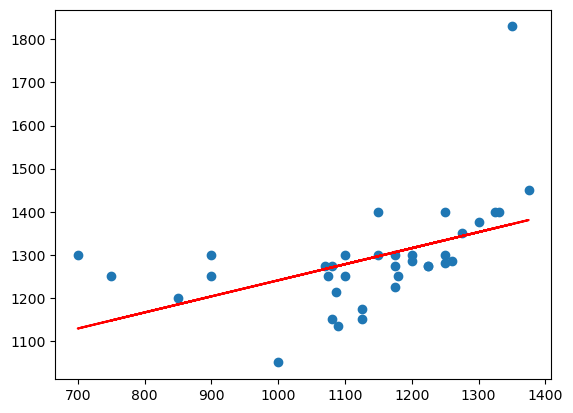

In [8]:
# Geração do gráfico com os pontos reais e as previsões - No código fornecido, estamos usando a biblioteca Matplotlib em Python para criar um gráfico de dispersão (scatter plot) dos dados contidos nas variáveis X e y, onde X representa os valores de entrada e y os valores de saída. Em seguida, traçamos uma linha vermelha (color = 'red') no gráfico, que representa as previsões do nosso modelo, calculadas usando o método `predict(X)`. Esse código visualiza a relação entre os dados reais e as previsões do modelo em um gráfico simples e eficaz.

plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

- A imagem acima é um gráfico de dispersão que mostra a relação entre os dados reais e as previsões feitas pelo modelo. 
- O gráfico tem pontos azuis representando os dados reais e uma linha vermelha representando as previsões feitas pelo modelo. 
- O eixo x varia de 700 a 1400 e o eixo y varia de 1100 a 1800. 
- Os pontos azuis estão espalhados ao redor da linha vermelha, indicando que as previsões feitas pelo modelo não são perfeitas, mas estão próximas dos dados reais. 
- A linha vermelha tem uma inclinação positiva, indicando que as previsões feitas pelo modelo estão positivamente correlacionadas com os dados reais. 

In [25]:
# Valor anual da franquina - O código em questão define o valor anual da franquia como 1300 e, em seguida, utiliza um modelo de previsão (provavelmente de machine learning) para fazer uma previsão com base nesse valor. O modelo é alimentado com o valor da franquia e retorna uma previsão relacionada a esse valor. Este código é bastante conciso, envolvendo uma única variável e uma única chamada à função de previsão do modelo.

valor =  1300
valor_previsto = modelo.predict([[valor]])
valor_previsto

array([1352.70953897])

In [26]:
# Esse código em Python cria uma string formatada que exibe o valor previsto com formatação monetária brasileira, incluindo o símbolo de real (R$), separadores de milhares e duas casas decimais. O valor previsto é obtido do objeto `valor_previsto` e é inserido na string formatada usando a função `format()`. Em seguida, a string formatada é impressa, exibindo o valor previsto de forma clara e organizada.

valor_previsto_formatado = "Valor previsto: R$ {:,.2f}".format(valor_previsto.item())
valor_previsto_formatado

'Valor previsto: R$ 1,352.71'

Portanto, podemos concluir que se o modelo for capaz de prever com precisão os valores do conjunto de teste, ele pode ser usado para prever o Investimento inicial necessário de novas franquias.

### Aqui estão alguns exemplos de como esse modelo pode ser usado:

- Um investidor pode usar o modelo para estimar o custo de abrir uma franquia antes de fazer um investimento.
- Um franqueador pode usar o modelo para comparar o custo de abertura de uma franquia com o potencial de receita.
- Um consultor pode usar o modelo para ajudar um empreendedor a decidir se uma franquia é um bom investimento.

### Aqui estão algumas limitações do modelo:

- O modelo só é tão bom quanto os dados em que foi treinado. Se os dados não forem representativos da população de franquias, o modelo pode não ser preciso.
- O modelo só pode prever o Investimento inicial necessário em média. O valor real pode variar de acordo com fatores específicos da franquia.
- Apesar dessas limitações, o modelo de regressão linear pode ser uma ferramenta útil para prever o Investimento inicial necessário de uma franquia.